In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

## plot the data and Basic EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

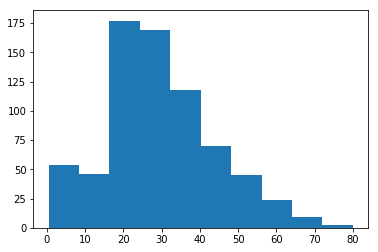

In [14]:
plt.hist(train["Age"].dropna().values)

In [51]:
 pd.cut(train["Age"].dropna(),4).value_counts()

(20.315, 40.21]    385
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: Age, dtype: int64

In [65]:
b = train["Age"].dropna()

In [75]:
train[(train["Age"]>0) and (train["Age"]<20.315)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [69]:
train[train["Age"]<20.315 & train["Age"]>0 ]

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

## Find the correlation between parameters

In [4]:
train_corr = train.corr()


In [ ]:
_ , ax = plt.subplots(211,figsize =(14, 12))
sns.heatmap(train_corr,vmin=0,vmax=1,annot=True)
_ , ax = plt.subplots(212,figsize =(14, 12))
sns.heatmap(train_corr,vmin=0,vmax=1,annot=True)

Signature: sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise they are inferred from the
    data and other keyword arguments.
cmap : matplotlib colorm

In [7]:
# observe the columns
train.columns

Index(['Unnamed: 0', 'PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Title', 'Name_length', 'LuckyElizabeth', 'LuckyAnna', 'LuckyMary',
       'Family', 'Alone', 'Fsize', 'Cabin_Lv', 'Survived'],
      dtype='object')

In [9]:
train_y = train["Survived"]
train_X = train.drop(["Survived"],axis=1)

In [7]:
train_X = train_X.fillna(train.mean())


In [8]:
train_X = pd.get_dummies(train_X)

In [9]:
train_X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [10]:
rig = RidgeClassifier(normalize=True)

In [11]:
params = {"alpha":np.logspace(-4,0,50)}

In [12]:
params

{'alpha': array([  1.00000000e-04,   1.20679264e-04,   1.45634848e-04,
          1.75751062e-04,   2.12095089e-04,   2.55954792e-04,
          3.08884360e-04,   3.72759372e-04,   4.49843267e-04,
          5.42867544e-04,   6.55128557e-04,   7.90604321e-04,
          9.54095476e-04,   1.15139540e-03,   1.38949549e-03,
          1.67683294e-03,   2.02358965e-03,   2.44205309e-03,
          2.94705170e-03,   3.55648031e-03,   4.29193426e-03,
          5.17947468e-03,   6.25055193e-03,   7.54312006e-03,
          9.10298178e-03,   1.09854114e-02,   1.32571137e-02,
          1.59985872e-02,   1.93069773e-02,   2.32995181e-02,
          2.81176870e-02,   3.39322177e-02,   4.09491506e-02,
          4.94171336e-02,   5.96362332e-02,   7.19685673e-02,
          8.68511374e-02,   1.04811313e-01,   1.26485522e-01,
          1.52641797e-01,   1.84206997e-01,   2.22299648e-01,
          2.68269580e-01,   3.23745754e-01,   3.90693994e-01,
          4.71486636e-01,   5.68986603e-01,   6.86648845e-01,

In [13]:
rig = GridSearchCV(rig,params)

In [14]:
rig.fit(train_X,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=True, random_state=None, solver='auto',
        tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.20679e-04,   1.45635e-04,   1.75751e-04,
         2.12095e-04,   2.55955e-04,   3.08884e-04,   3.72759e-04,
         4.49843e-04,   5.42868e-04,   6.55129e-04,   7.90604e-04,
         9.54095e-04,   1.15140e-03,   1.38950e-03,   1.67683e-03,
         2....    3.90694e-01,   4.71487e-01,   5.68987e-01,   6.86649e-01,
         8.28643e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:

test_X = test.drop(["Name", "Ticket","Embarked","Cabin"],axis=1)
test_X = test_X.fillna(train.mean())
test_X = pd.get_dummies(test_X)

In [16]:
test_X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0


In [16]:
a = rig.predict(test)

In [17]:
rig.best_params_

{'alpha': 0.0035564803062231283}

In [18]:
rig.best_sc

0.80022446689113358

In [20]:
df = test["PassengerId"].to_frame()

In [21]:
df["Survived"] = a

In [22]:
len(df)

418

In [23]:
df.to_csv("output.csv",index=False)